In [1]:
import os
from gpuutils import GpuUtils
GpuUtils.allocate(gpu_count=1, framework='keras')

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True) 

import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
np.set_printoptions(precision=3, suppress=True)
from sklearn.preprocessing import MinMaxScaler

from NuRadioMC.SignalProp import analyticraytracing as ray
from NuRadioMC.utilities.medium import southpole_2015

GPU 0  will be allocated
trying to compile the CPP extension on-the-fly
compilation was not sucessful, using python version of ray tracer


In [8]:
# df = pd.read_csv('/mnt/md0/aholmberg/data/raytrace_samples_random.csv')
df = pd.read_csv('/mnt/md0/aholmberg/data/raytrace_samples_sobol_24.csv')
# df = pd.read_pickle('/mnt/md0/aholmberg/data/raytracing_24_spherical.pkl')
# df = pd.read_pickle('/mnt/md0/aholmberg/data/raytracing_random_spherical.pkl')

In [9]:
#print(df.iloc[0]['launch_vec_r'], df.iloc[0]['launch_vec_z'])
#print(np.degrees(np.arctan2(-df.iloc[0]['launch_vec_z'], -df.iloc[0]['launch_vec_r'])) + 360 - 90)
#print(df.iloc[0]['recieve_vec_r'], df.iloc[0]['recieve_vec_z'])
#print(np.degrees(np.arctan2(df.iloc[0]['recieve_vec_z'], df.iloc[0]['recieve_vec_r'])))


# redefine the angle to suit convention
df['l_angle_tmp'] = np.degrees(np.arctan2(-df['launch_vec_z'], -df['launch_vec_r']))# + 360 - 90
df.loc[df['l_angle_tmp'] < 0, 'l_angle_tmp'] += 360
df['l_angle'] = df['l_angle_tmp'] - 90
df['tmp'] = np.degrees(np.arctan2(df['recieve_vec_z'], df['recieve_vec_r']))
df.loc[df['tmp'] < 0, 'tmp'] += 360
df['r_angle'] = df['tmp'] - 90
df = df.drop(columns=['tmp', 'launch_angle', 'recieve_angle', 'l_angle_tmp'])

# change source coordinates to spherical/polar 3d/2d
#print(df.iloc[0]['source_pos_r'], df.iloc[0]['source_pos_z'])
#print(np.degrees(np.arctan2(df.iloc[0]['source_pos_z'] - df.iloc[0]['antenna_pos_z'], df.iloc[0]['source_pos_r'])) + 360 - 90)
#print(np.sqrt(np.power(df.iloc[0]['source_pos_z'] - df.iloc[0]['antenna_pos_z'], 2) + np.power(df.iloc[0]['source_pos_r'], 2)))

df['source_pos_d'] = np.sqrt(np.power(df['source_pos_z'] - df['antenna_pos_z'], 2) + np.power(df['source_pos_r'], 2))
df['source_pos_phi'] = np.degrees(np.arctan2(df['source_pos_z'] - df['antenna_pos_z'], df['source_pos_r']))
df.loc[df['source_pos_phi'] < 0, 'source_pos_phi'] += 360
df['source_pos_phi'] = df['source_pos_phi'] - 90
df = df.drop(columns=['source_pos_r', 'source_pos_z', 'launch_vec_r', 'launch_vec_z', 'recieve_vec_r', 'recieve_vec_z'])
print(df['r_angle'].max(), df['r_angle'].min())
print(df['l_angle'].max(), df['l_angle'].min())


179.97667995916038 0.020234112941295734
179.98027020255893 0.3961337112648664


In [10]:
# df.to_pickle('/mnt/md0/aholmberg/data/raytracing_random_spherical.pkl')
df.to_pickle('/mnt/md0/aholmberg/data/raytracing_24_spherical.pkl')

In [11]:
df.head()

,type,antenna_pos_z,travel_time,path_length,l_angle,r_angle,source_pos_d,source_pos_phi
0,1,-100.751798,8533.739700,1442.308943,169.602453,168.880122,1442.307268,169.564512
1,3,-100.751798,9551.954357,1640.948938,171.044691,9.575469,1442.307268,169.564512
2,1,-55.432448,8980.282384,1523.473867,146.614760,141.519403,1523.323899,146.320827
3,3,-55.432448,9401.089441,1617.930019,149.377922,35.170222,1523.323899,146.320827
4,1,-193.666015,15064.523751,2539.241494,137.207927,136.159910,2539.235347,137.164857


In [12]:
import matplotlib.pyplot as plt

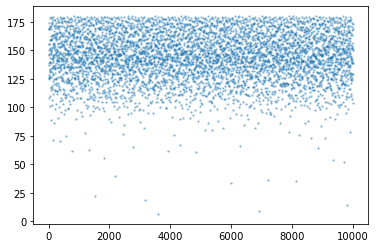

In [13]:
plt.scatter(range(10000), df['source_pos_phi'].iloc[:10000], s=2, alpha=0.2)